# mmBSF: An Open Dataset for mmWave Indoor Localization

- mmBSF: mmWave Beam SNR Fingerprinting

by [Pu (Perry) Wang](https://www.merl.com/people/pwang), [Toshiaki Koike-Akino](https://www.merl.com/people/koike), Milutin Pajovic, and [Philip V. Orlik](https://www.merl.com/people/porlik)

Mitsubishi Electric Research Laboratories (MERL), 201 Broadway, Cambridge, MA 02139, USA

- **link to dataset**: https://www.merl.com/demos/mmBSF


Joint work with the intern Dr. Haijian Sun from Utah State University (now an Assistant Professor in University of Wisconsin-Whitewater) who contributed to the early stage of the project and single-AP experiments.


### Introduction

Most fingerprinting-based indoor localization methods use 

- **coarse-grained** received signal strength indicator (RSSI) measurements from the MAC layer
- **fine-grained** channel state information (CSI) from the physical layer 

In this study, we consider a new type of channel measurement in the mmWave band for the fingerprinting-based indoor localization:

- **mid-grained** channel measurement: beam signal-to-noise ratios (SNRs) 

which are more informative (e.g., in the spatial domain) than the RSSI measurement and easier to access
than the lower-level CSI measurement as the beam SNRs are required to be reported by users for mmWave beam
training (therefore, no additional overhead). Beam SNRs are defined in the 5G and IEEE 802.11ad/ay standards. 

For more details about beam SNR, refer to our recent papers:

- [GLOBECOME 2019 paper](https://www.merl.com/publications/docs/TR2019-138.pdf)
- [GLOBECOME 2019 paper](https://www.merl.com/publications/docs/TR2019-141.pdf)
- [IEEE Access paper](https://www.merl.com/publications/docs/TR2020-054.pdf)


### mmWave Beam SNR

- To search for desired directions, a series of pre-defined beampatterns or sectors are used by APs to send beacon messages to potential clients which are in a listening mode with a quasi-omnidirectional beampattern. 

- Clients then send a series of beampatterns while the APs are in a listening mode. After beam training, the link can be established by choosing the pair of beampatterns between the AP and clients.  

- Such beam training is periodically repeated and the beam sectors are updated to adapt to the environmental changes.

When directional beampatterns are used, beam SNRs are collected by 802.11ad devices as a measure of beam quality. For a given pair of transmitting and receiving beampatterns, corresponding beam SNR can be defined as
$$
h_m = \mathsf{BeamSNR}_m = \frac{1}{\sigma^2} \sum\limits_{i=1}^I \gamma_m(\theta_i) \zeta_m(\psi_i) P_i,
$$
where $m$ is the index of beampattern, $I$ is the total number of paths, $\theta_i$ and $\psi_i$ are the transmitting and receiving azimuth angles for the $i$th path, respectively,  $P_i$ is the signal power at the $i$th path, $\gamma_m(\theta_i)$ and $\zeta_m(\psi_i)$  are the transmitting and receiving beampattern gains at the $i$th path for the $m$th beampattern, respectively, and $\sigma^2$ is the noise variance. 



<td> <img src="figs/beamSNR.png" alt="Drawing" style="width: 500px;"/> </td>


An example of 3 paths between the transmitting side that probes the spatial domain using the $(m=24)$th directional beampattern and the receiving side which is in a listening mode. 



### MERL In-House Testbed


The testbed consists of four 802.11ad-compliant WiFi routers, three serving as APs and one as the client, in a configuration shown below. These devices are connected via wire cables to a workstation to allow configurations of the role of each device and to access the beam SNR measurements. Particularly, these commerical WiFi routers come with a phased antenna array of 32 antenna elements and fully implement the IEEE 802.11ad
standard. During the beam training phase, a number of predefined antenna patterns are swept by changing the weights in the antenna elements. When the router is in the reception mode, a quasi omni-directional antenna pattern is used.

<td> <img src="figs/testbed.png" alt="Drawing" style="width: 300px;"/> </td>


The testbed was deployed in an office environment during regular office hours. There are 6 offices on both sides and 8 cubicles in the middle. All 6 offices and 4 cubicles on the right were occupied by staff members. Furniture including chairs, tables, and desktops were present in the cubicles.

<td> <img src="figs/coord.pdf" alt="Drawing" style="width: 450px;"/> </td>
    
Configuration: 

- 3 APs were fixed in the aisle with fixed orientations. AP1, AP2 and AP3 point to $90^{\circ}, 180^{\circ} \text{ and } 0^{\circ},$ respectively. 

- 7 on-grid locations (denoted as 1, 2, ..., 7 in the above figure) were fingerprinted on Day 1 for training. 4 orientations were also fingerprinted for each location. 

- The same 7 on-grid locations and orientations were fingerprinted on Day 2 for testing. 

- The 4 off-grid locations (denoted as A, B, C, and D) were fingerprinted on Day 3 for testing. 





### Data Format

We collected **ONE** training data for fingerprinting both location and orientations and **TWO** test datasets, all on different dates during regular office hours. 

- 1 **training dataset** was collected over 7 locations with 4 orientations for each location
  - 12007 entries
  - For each entries, it has
    - A location Label (1 to 7)
    - A global location-and-orientation label (1 to 28)
    - An orientation degree ($0^{\circ}, 90^{\circ}, 180^{\circ}, 270^{\circ}$)
    - A two-dimensional coordinate (in centimeters)
    - 108 beam SNR values (36 beam SNR values for one AP)
 

- 2 **test dataset** 
  - **on-grid test dataset**: the same 7 locations and 4 orientations as in the training dataset collected a few weeks after the training dataset
      - 7361 entries with the same format as the training dataset
          - A location Label (1 to 7)
          - A global location-and-orientation label (1 to 28)
          - An orientation degree ($0^{\circ}, 90^{\circ}, 180^{\circ}, 270^{\circ}$)
          - A two-dimensional coordinate (in centimeters)
          - 108 beam SNR values (36 beam SNR values for one AP)

  - **off-grid test dataset**: 4 different locations with 4 orientations for each location, collected 4 months after the training dataset
    - 2044 entries
        - A location Label (A,B,C,D)
        - An orientation degree ($0^{\circ}, 90^{\circ}, 180^{\circ}, 270^{\circ}$)
        - A two-dimensional coordinate (in centimeters)
        - 108 beam SNR values (36 beam SNR values for one AP)

### Import libraries

In [10]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm

# Load mmBSF dataset

first load training data with the following format:
  - 12007 entries
  - For each entries, it has
    - A location Label (1 to 7)
    - A global location-and-orientation label (1 to 28)
    - An orientation degree ($0^{\circ}, 90^{\circ}, 180^{\circ}, 270^{\circ}$)
    - A two-dimensional coordinate (in centimeters)
    - 108 beam SNR values (36 beam SNR values for one AP)

In [11]:
data_path = 'datasets/mmBSF_trainData.csv'
trainBSF  = pd.read_csv(data_path)

In [12]:
### check the header
trainBSF.head()

,Loc.,LocOrn,OrnDeg,coordX,coordY,BeamIndex_1 (AP1),BeamIndex_2 (AP1),BeamIndex_3 (AP1),BeamIndex_4 (AP1),BeamIndex_5 (AP1),...,BeamIndex_27 (AP3),BeamIndex_28 (AP3),BeamIndex_29 (AP3),BeamIndex_30 (AP3),BeamIndex_31 (AP3),BeamIndex_32 (AP3),BeamIndex_33 (AP3),BeamIndex_34 (AP3),BeamIndex_35 (AP3),BeamIndex_36 (AP3)
0,1,1,0,53,133,27.44,24.88,22.94,25.31,22.31,...,21.06,19.56,21.94,21.81,18.44,21.88,20.44,24.56,18.31,23.56
1,1,1,0,53,133,27.00,24.75,22.75,24.94,22.13,...,20.88,19.19,21.63,21.56,18.31,21.69,20.19,24.13,18.13,23.31
2,1,1,0,53,133,26.69,24.50,22.19,24.56,21.94,...,23.31,21.81,24.06,23.94,20.50,23.94,22.69,26.81,20.75,25.50
3,1,1,0,53,133,26.94,24.31,22.00,24.56,21.75,...,21.69,19.88,22.38,22.19,18.94,22.31,21.31,24.25,18.75,24.00
4,1,1,0,53,133,28.38,25.69,23.75,26.13,23.38,...,21.44,19.75,22.31,22.00,18.88,22.00,20.94,24.06,18.56,23.75


In [13]:
trainBSF.loc[10,:]

Loc.                    1.00
LocOrn                  1.00
OrnDeg                  0.00
coordX                 53.00
coordY                133.00
BeamIndex_1 (AP1)      28.38
BeamIndex_2 (AP1)      25.69
BeamIndex_3 (AP1)      23.81
BeamIndex_4 (AP1)      26.00
BeamIndex_5 (AP1)      23.44
BeamIndex_6 (AP1)      22.56
BeamIndex_7 (AP1)      25.38
BeamIndex_8 (AP1)      25.25
BeamIndex_9 (AP1)      23.94
BeamIndex_10 (AP1)     23.31
BeamIndex_11 (AP1)     24.63
BeamIndex_12 (AP1)     28.13
BeamIndex_13 (AP1)     24.63
BeamIndex_14 (AP1)     27.75
BeamIndex_15 (AP1)     26.50
BeamIndex_16 (AP1)     25.19
BeamIndex_17 (AP1)     23.75
BeamIndex_18 (AP1)     30.13
BeamIndex_19 (AP1)     28.13
BeamIndex_20 (AP1)     28.88
BeamIndex_21 (AP1)     22.13
BeamIndex_22 (AP1)     24.06
BeamIndex_23 (AP1)     23.69
BeamIndex_24 (AP1)     25.63
BeamIndex_25 (AP1)     24.63
                       ...  
BeamIndex_7 (AP3)      22.44
BeamIndex_8 (AP3)      24.44
BeamIndex_9 (AP3)      21.25
BeamIndex_10 (

In [47]:
### extract columns for position and orientation classification

fields_to_drop = ['OrnDeg', 'coordX', 'coordY'] # only loc. and locOrn labels
trainData      = trainBSF.drop(fields_to_drop, axis=1)
trainData.head()

,Loc.,LocOrn,BeamIndex_1 (AP1),BeamIndex_2 (AP1),BeamIndex_3 (AP1),BeamIndex_4 (AP1),BeamIndex_5 (AP1),BeamIndex_6 (AP1),BeamIndex_7 (AP1),BeamIndex_8 (AP1),...,BeamIndex_27 (AP3),BeamIndex_28 (AP3),BeamIndex_29 (AP3),BeamIndex_30 (AP3),BeamIndex_31 (AP3),BeamIndex_32 (AP3),BeamIndex_33 (AP3),BeamIndex_34 (AP3),BeamIndex_35 (AP3),BeamIndex_36 (AP3)
0,1,1,27.44,24.88,22.94,25.31,22.31,21.94,24.38,24.38,...,21.06,19.56,21.94,21.81,18.44,21.88,20.44,24.56,18.31,23.56
1,1,1,27.00,24.75,22.75,24.94,22.13,21.56,24.00,24.00,...,20.88,19.19,21.63,21.56,18.31,21.69,20.19,24.13,18.13,23.31
2,1,1,26.69,24.50,22.19,24.56,21.94,21.31,23.94,23.94,...,23.31,21.81,24.06,23.94,20.50,23.94,22.69,26.81,20.75,25.50
3,1,1,26.94,24.31,22.00,24.56,21.75,21.13,23.69,23.69,...,21.69,19.88,22.38,22.19,18.94,22.31,21.31,24.25,18.75,24.00
4,1,1,28.38,25.69,23.75,26.13,23.38,22.81,25.56,25.50,...,21.44,19.75,22.31,22.00,18.88,22.00,20.94,24.06,18.56,23.75


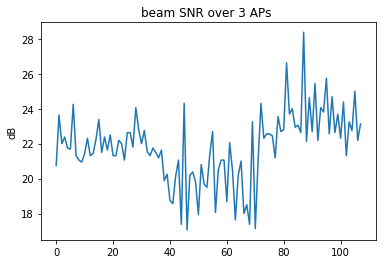

In [15]:
### check beam SNR
tempData = trainData.values
dataSNR  = trainData.iloc[:,2:110].values

plt.figure()
plt.plot(dataSNR[1000,:])
plt.title('beam SNR over 3 APs ')
plt.ylabel('dB');

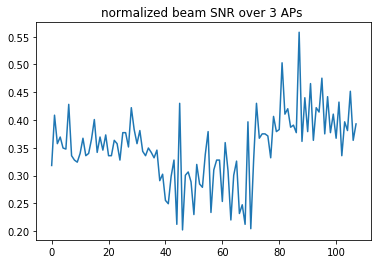

In [16]:
# normalization (if desired, optional) into [0, 1]
minSNR  = dataSNR.min(axis=0).min()
maxSNR  = dataSNR.max(axis=0).max()

normSNR = (dataSNR-minSNR)/(maxSNR-minSNR)

# you can also apply standarlization to the normalized data as well. 
# Make sure you apply the same standarization value to the training and test datasets.


plt.figure()
plt.plot(normSNR[1000,:])
plt.title('normalized beam SNR over 3 APs ');

In [17]:
# get the location-only and location-and-orientation labels

# locLabel    = trainData.iloc[:,0].values
locOrnLabel = trainData.iloc[:,1].values

In [18]:
# convert train_data into floatTensor type
y_tensor     = torch.from_numpy(locOrnLabel)
# convert to longTensor for classification 
y_tensor     = y_tensor.type(torch.LongTensor)-1 # starting from 0

# array format for location/orientation labels
xnorm_tensor = torch.from_numpy(normSNR)
[d1, d2]     = xnorm_tensor.size()

### split into training and validation for each position/orientation

In [19]:
splitRatio = 0.1  # 10% split ratio

nClass    = torch.zeros(28)
ind_train = torch.LongTensor()
ind_val   = torch.LongTensor()

for ll in range(28):
    indClass    = (y_tensor == ll).nonzero()
    nClass[ll]  = indClass.size(0)
    nVal        = int(splitRatio*nClass[ll]) # use the last (splitRatio x 100) percent for each class for validation
    
    ind_train    = torch.cat((ind_train, indClass[:-nVal] ))
    ind_val      = torch.cat((ind_val, indClass[-nVal:]))

xnorm_train  = xnorm_tensor[ind_train.squeeze(),:].type(torch.FloatTensor)
y_train      = y_tensor[ind_train.squeeze()]

xnorm_val    = xnorm_tensor[ind_val.squeeze(),:].type(torch.FloatTensor)
y_val        = y_tensor[ind_val.squeeze()]

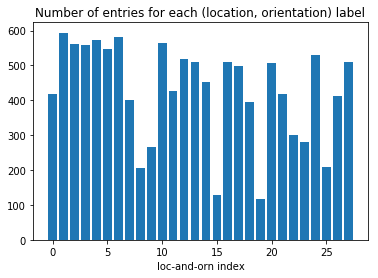

In [20]:
### check the number of entries for each (location, orientation) label
plt.bar(torch.arange(28),nClass)
plt.title('Number of entries for each (location, orientation) label');
plt.xlabel('loc-and-orn index');

### load the (on-grid) test dataset

the same 7 locations and 4 orientations as in the training dataset...

the on-grid test dataset was collected **a few weeks after** the collection of the training dataset.

- 7361 entries with the same format as the training dataset
    - A location Label (1 to 7)
    - A global location-and-orientation label (1 to 28)
    - An orientation degree ($0^{\circ}, 90^{\circ}, 180^{\circ}, 270^{\circ}$)
    - A two-dimensional coordinate (in centimeters)
    - 108 beam SNR values (36 beam SNR values for one AP)

In [46]:
# the same way we load the training dataset
data_path = 'datasets/mmBSF_testData_ongrid.csv'
testBSF   = pd.read_csv(data_path)

fields_to_drop = ['OrnDeg', 'coordX', 'coordY'] # only loc. and locOrn labels
testData      = testBSF.drop(fields_to_drop, axis=1)

testData.head()

,Loc.,LocOrn,BeamIndex_1 (AP1),BeamIndex_2 (AP1),BeamIndex_3 (AP1),BeamIndex_4 (AP1),BeamIndex_5 (AP1),BeamIndex_6 (AP1),BeamIndex_7 (AP1),BeamIndex_8 (AP1),...,BeamIndex_27 (AP3),BeamIndex_28 (AP3),BeamIndex_29 (AP3),BeamIndex_30 (AP3),BeamIndex_31 (AP3),BeamIndex_32 (AP3),BeamIndex_33 (AP3),BeamIndex_34 (AP3),BeamIndex_35 (AP3),BeamIndex_36 (AP3)
0,1,1,27.94,25.19,22.44,25.75,23.25,22.50,25.13,24.81,...,19.13,18.94,24.19,21.56,17.63,20.38,17.75,21.25,18.38,24.69
1,1,1,26.81,24.88,22.31,25.94,22.81,22.00,24.88,24.44,...,18.69,18.44,23.63,20.75,17.19,19.50,17.50,20.50,17.75,24.25
2,1,1,26.38,24.56,21.88,25.31,22.44,21.69,24.63,24.06,...,20.94,20.94,25.81,23.06,19.25,21.56,19.50,22.44,19.94,26.00
3,1,1,26.19,24.31,21.81,24.94,22.31,21.44,24.31,23.88,...,18.38,18.31,23.31,20.38,16.75,19.06,17.00,19.81,17.63,23.88
4,1,1,26.13,24.31,21.63,24.94,22.06,21.38,24.06,23.81,...,17.13,17.00,21.44,18.69,15.88,17.63,16.06,18.31,16.38,21.88


In [44]:
tempData = testData.values
dataSNR_test  = testData.iloc[:,2:110].values

# normalization (if desired, optional) into [0, 1]
normSNR_test = (dataSNR_test-minSNR)/(maxSNR-minSNR)   # use the same min and max as the ones used for training data

# get the target field
# locLabel    = testData.iloc[:,0].values
locOrnLabel = testData.iloc[:,1].values

# into floatTensor type
y_test     = torch.from_numpy(locOrnLabel)
y_test     = y_test.type(torch.LongTensor)-1 # starting from 0

# array format for location/orientation labels
x_test     = torch.from_numpy(normSNR_test).type(torch.FloatTensor)

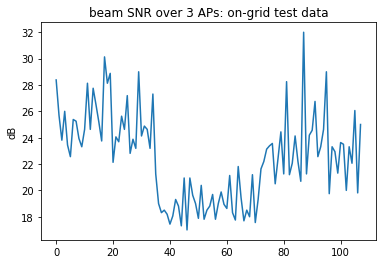

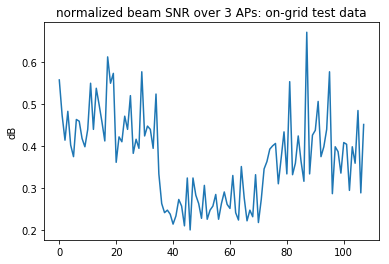

In [45]:
plt.figure()
plt.plot(dataSNR[10,:])
plt.title('beam SNR over 3 APs: on-grid test data')
plt.ylabel('dB');

plt.figure()
plt.plot(normSNR[10,:])
plt.title('normalized beam SNR over 3 APs: on-grid test data')
plt.ylabel('dB');

### load the (off-grid) test dataset

4 different locations with 4 orientations for each location, collected **4 months after** the collection of the training dataset

- 2044 entries
    - A location Label (A,B,C,D)
    - An orientation degree ($0^{\circ}, 90^{\circ}, 180^{\circ}, 270^{\circ}$)
    - A two-dimensional coordinate (in centimeters)
    - 108 beam SNR values (36 beam SNR values for one AP)

In [26]:
# the same way we load the training dataset
data_path         = 'datasets/mmBSF_testData_offgrid.csv'
testBSF_offgrid   = pd.read_csv(data_path)

fields_to_drop = ['Loc.','OrnDeg']  # only keep coordinates
testData_offgrid       = testBSF_offgrid.drop(fields_to_drop, axis=1)
testData_offgrid.head()

,coordX,coordY,BeamIndex_1 (AP1),BeamIndex_2 (AP1),BeamIndex_3 (AP1),BeamIndex_4 (AP1),BeamIndex_5 (AP1),BeamIndex_6 (AP1),BeamIndex_7 (AP1),BeamIndex_8 (AP1),...,BeamIndex_27 (AP3),BeamIndex_28 (AP3),BeamIndex_29 (AP3),BeamIndex_30 (AP3),BeamIndex_31 (AP3),BeamIndex_32 (AP3),BeamIndex_33 (AP3),BeamIndex_34 (AP3),BeamIndex_35 (AP3),BeamIndex_36 (AP3)
0,83.0,155.0,28.94,22.88,29.00,25.81,24.56,28.50,28.63,24.31,...,21.00,21.00,21.50,19.19,18.50,21.06,19.19,26.69,18.63,20.63
1,83.0,155.0,28.88,22.44,28.25,25.19,24.31,28.19,28.25,24.06,...,20.56,20.69,21.25,18.81,18.38,20.56,19.00,26.63,18.19,20.69
2,83.0,155.0,28.56,22.63,28.81,25.31,24.56,28.31,28.38,24.38,...,19.94,19.81,20.19,18.44,17.69,19.88,18.44,25.63,17.69,19.81
3,83.0,155.0,27.94,21.50,27.00,24.19,23.38,27.13,27.31,23.19,...,20.06,19.81,20.25,18.38,17.63,19.81,18.44,25.44,17.81,19.81
4,83.0,155.0,28.75,21.69,27.81,24.63,23.75,27.25,28.06,23.56,...,21.06,20.56,21.56,18.94,18.38,20.94,19.06,26.69,18.56,20.63


In [39]:
tempData              = testData_offgrid.values
dataSNR_test_offgrid  = testData_offgrid.iloc[:,2:].values  # beam SNRs:

# normalization (if desired, optional) into [0, 1] with the same minSNR and maxSNR for the training data
normSNR_test_offgrid = (dataSNR_test_offgrid-minSNR)/(maxSNR-minSNR)   # use the same min and max as the ones used for training data

# you can also apply standarlization to the normalized data as well. 
# Make sure you apply the same standarization value to the training and test datasets.

# get the target field
coord_test = testData_offgrid.iloc[:,0:2].values

# into floatTensor type
y_test_offgrid     = torch.from_numpy(coord_test)

# array format for location/orientation labels
x_test_offgrid     = torch.from_numpy(normSNR_test_offgrid).type(torch.FloatTensor)

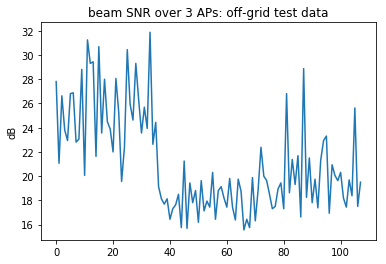

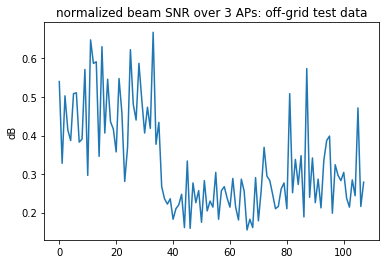

In [42]:
plt.figure()
plt.plot(dataSNR_test_offgrid[10,:])
plt.title('beam SNR over 3 APs: off-grid test data')
plt.ylabel('dB');

plt.figure()
plt.plot(x_test_offgrid[10,:])
plt.title('normalized beam SNR over 3 APs: off-grid test data')
plt.ylabel('dB');